In [1]:
!wget https://www.dropbox.com/sh/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra?dl=0

--2020-11-17 02:11:47--  https://www.dropbox.com/sh/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra [following]
--2020-11-17 02:11:48--  https://www.dropbox.com/sh/raw/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2f10af4c05da624440261de899.dl.dropboxusercontent.com/zip_download_get/Ams9qgjvK6IHkaSROe2ZYiGt42hLekZWziejWfvt9o3D4oN9HK15t382hiN5QzNkRbzOAqZPGszO3VhcwZoPBO-dLju2QUGAKQI2WW9DJzfyeQ [following]
--2020-11-17 02:11:49--  https://uc2f10af4c05da624440261de899.dl.dropboxusercontent.com/zip_download_get/Ams9qgjvK6IHkaSROe2ZYiGt42hLekZWziejWfvt9o3D4oN9HK15t382hiN5QzNkRbzOAqZPGszO3VhcwZoP

In [ ]:
!unzip Ds

In [3]:
TRAIN_PATH="Ds/train"

In [4]:
VAL_PATH="Ds/val"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [8]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [9]:
#creating actual generator function
train_generator=train_datagen.flow_from_directory(
    'train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 726 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'normal': 0, 'pf': 1}

In [11]:
validation_generator=test_dataset.flow_from_directory(
    'val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 164 images belonging to 2 classes.


In [12]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 66s 8s/step - loss: 0.5322 - accuracy: 0.7031 - val_loss: 0.3877 - val_accuracy: 0.9375
Epoch 2/10
8/8 [==============================] - 65s 8s/step - loss: 0.0611 - accuracy: 0.9797 - val_loss: 2.5113e-04 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 65s 8s/step - loss: 0.0170 - accuracy: 0.9961 - val_loss: 0.0807 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 68s 8s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 4.6503e-04 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 63s 8s/step - loss: 0.0430 - accuracy: 0.9959 - val_loss: 1.8246e-06 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 65s 8s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.3164e-04 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 63s 8s/step - loss: 0.0113 - a

In [13]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.007565503474324942, 1.0]

In [14]:
model.evaluate_generator(validation_generator)

[0.010072128847241402, 1.0]

In [15]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [16]:
import os

In [17]:
train_generator.class_indices

{'normal': 0, 'pf': 1}

In [18]:
y_actual=[]
y_test=[]

In [19]:
for i in os.listdir("./val/normal/"):
  img=image.load_img("./val/normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
for i in os.listdir("./val/pf/"):
  img=image.load_img("./val/pf/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [21]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(y_actual, y_test)

In [24]:
import seaborn as sns

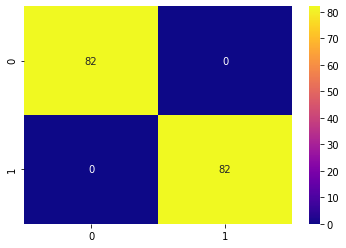

In [25]:
sns.heatmap(cm, cmap='plasma',annot=True)

In [ ]:
#0->normal, 1->pf
# TP, FN
# FP,TN